# 0) Data Loading

In [1]:
# !pip install pandas        # To work with tables
# !pip install geopandas     # To make Maps 
# !pip install folium        # To make Maps
# !pip install scikit-learn  # To apply Machine Learning models and preprocessing methods
# !pip install warnings      # To suppress warnings

In [2]:
# Setting default param values
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [3]:
# Suppresing the future warnings
import warnings
warnings.simplefilter("ignore")

In [4]:
import pandas as pd

# Data files path
file1 = "../data/dft-road-casualty-statistics-casualty-2022.csv"
file2 = "../data/dft-road-casualty-statistics-collision-2022.csv"
file3 = "../data/dft-road-casualty-statistics-vehicle-2022.csv"

# Reading CSV files into DataFrames
df_casualty = pd.read_csv(file1)
df_collision = pd.read_csv(file2)
df_vehicle = pd.read_csv(file3)

In [5]:
# Printing column names of each DataFrame
print("Column names of 'dft-road-casualty-statistics-casualty-2022.csv':")
print(df_casualty.columns)
print("\nColumn names of 'dft-road-casualty-statistics-collision-2022.csv':")
print(df_collision.columns)
print("\nColumn names of 'dft-road-casualty-statistics-vehicle-2022.csv':")
print(df_vehicle.columns)

Column names of 'dft-road-casualty-statistics-casualty-2022.csv':
Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')

Column names of 'dft-road-casualty-statistics-collision-2022.csv':
Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'fi

In [6]:
# Merging datasets on 'accident_index'
df_merged = pd.merge(df_casualty, df_collision, on='accident_index')
df_merged = pd.merge(df_merged, df_vehicle, on='accident_index')

print("Merged DataFrame:")
df_merged.head()

Merged DataFrame:


,accident_index,accident_year_x,accident_reference_x,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_year,accident_reference,vehicle_reference_y,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2022010352073,2022,10352073,2,1,1,1,17,4,3,0,0,0,0,0,3,1,1,E01001364,2022,10352073,525199.0,177928.0,-0.198224,51.486454,1,3,2,1,05/01/2022,4,16:40,-1,E09000013,E09000013,3,3218,6,30,6,4,6,0,0,0,4,1,1,0,0,1,1,2,E01001883,2022,10352073,1,19,0,9,3,8,0,1,0,0,0,0,1,2,2,1,48,8,1461,2,4,RENAULT KANGOO,7,1,E01002687
1,2022010352073,2022,10352073,2,1,1,1,17,4,3,0,0,0,0,0,3,1,1,E01001364,2022,10352073,525199.0,177928.0,-0.198224,51.486454,1,3,2,1,05/01/2022,4,16:40,-1,E09000013,E09000013,3,3218,6,30,6,4,6,0,0,0,4,1,1,0,0,1,1,2,E01001883,2022,10352073,2,3,0,18,1,5,0,1,0,0,0,0,1,1,2,1,17,4,125,1,1,HONDA FSH125,1,1,E01001364
2,2022010352573,2022,10352573,1,1,1,2,42,7,3,0,0,0,0,0,9,1,5,E01000338,2022,10352573,546214.0,179866.0,0.105042,51.498830,1,3,2,1,01/01/2022,7,01:17,-1,E09000011,E09000011,3,2016,3,50,6,2,6,0,0,4,4,1,1,0,0,2,1,2,E01033745,2022,10352573,1,9,0,18,7,3,0,6,0,0,1,1,1,1,6,2,42,7,-1,-1,-1,-1,5,1,E01000338
3,2022010352573,2022,10352573,1,1,1,2,42,7,3,0,0,0,0,0,9,1,5,E01000338,2022,10352573,546214.0,179866.0,0.105042,51.498830,1,3,2,1,01/01/2022,7,01:17,-1,E09000011,E09000011,3,2016,3,50,6,2,6,0,0,4,4,1,1,0,0,2,1,2,E01033745,2022,10352573,2,9,0,13,7,3,0,6,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,2022010352575,2022,10352575,1,1,1,1,20,4,3,0,0,0,0,0,9,1,8,E01000390,2022,10352575,551119.0,174789.0,0.173482,51.451924,1,3,2,1,01/01/2022,7,01:15,-1,E09000004,E09000004,3,207,6,30,9,4,6,0,0,0,4,1,1,0,0,1,1,2,E01000378,2022,10352575,1,9,0,18,4,8,0,2,0,0,0,0,1,1,6,1,20,4,1896,2,15,VOLKSWAGEN GOLF,8,1,E01000390


In [7]:
df_merged.shape

(168884, 81)

# 1) Basic Data Preparation

In [8]:
# Dropping columns with only one unique value
constant_columns = [col for col in df_merged.columns if df_merged[col].nunique() == 1]
df_merged = df_merged.drop(columns=constant_columns)

In [9]:
# Columns with suffixes '_y'
columns_to_drop = [col for col in df_merged.columns if col.endswith('_y')]

# Dropping all columns with suffixes _y
df_merged.drop(columns=columns_to_drop, inplace=True)

In [10]:
# Checking Nulls
temp = df_merged.isnull().sum()
temp[temp>0]

location_easting_osgr     34
location_northing_osgr    34
longitude                 34
latitude                  34
dtype: int64

In [11]:
# Dropping NAN
df_merged.dropna(inplace=True)

In [12]:
# Setting date columns format
df_merged['date'] = pd.to_datetime(df_merged['date'], format='mixed')
df_merged['time'] = pd.to_datetime(df_merged['time'], format='%H:%M').dt.time

In [13]:
# Columns not to encode
special_columns = ["hit_object_off_carriageway", "skidding_and_overturning", "hit_object_in_carriageway", 
 "accident_reference", "special_conditions_at_site", "carriageway_hazards", "speed_limit",
"first_road_number", "accident_index", "casualty_reference"]

# Getting Mapper data 
df_guide = pd.read_excel("../data/dft-road-casualty-statistics-road-safety-open-dataset-data-guide-2023.xlsx", sheet_name="Sheet1")[['field name', 'code/format', 'label']]
temp = df_guide["field name"].value_counts()
temp = temp[temp>2]
temp = temp[temp<100]
temp = temp.drop(special_columns)
temp

field name
police_force                                    53
vehicle_type                                    31
casualty_type                                   31
vehicle_manoeuvre                               20
vehicle_location_restricted_lane                13
propulsion_code                                 13
injury_based_severity_code                      12
age_band_of_driver                              12
pedestrian_location                             12
age_band_of_casualty                            12
driver_imd_decile                               11
vehicle_direction_from                          11
vehicle_direction_to                            11
vehicle_leaving_carriageway                     11
junction_detail                                 11
junction_location                               11
pedestrian_movement                             11
casualty_imd_decile                             11
weather_conditions                              10
second_road_class   

In [14]:
# Encoding Columns values
for column in temp.index:
    if column in df_merged.columns:
        mapper_data = df_guide[df_guide["field name"] == column][['code/format', 'label']].set_index('code/format')
        mapper = mapper_data["label"].to_dict()
        df_merged[column] = df_merged[column].map(mapper)

# 2) Exploratory Data Analysis (EDA)
## 2.1) Basic Exploration

In [15]:
# Analyze general statistics
print("Statistics of the Numerical Columns:")
display(df_merged.describe())

print("Statistics of the Categorical Columns:")
display(df_merged.describe(include='O'))

Statistics of the Numerical Columns:


,vehicle_reference_x,casualty_reference,age_of_casualty,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,date,first_road_number,speed_limit,special_conditions_at_site,carriageway_hazards,skidding_and_overturning,hit_object_in_carriageway,hit_object_off_carriageway,age_of_driver,engine_capacity_cc,age_of_vehicle
count,168850.000000,168850.000000,168850.000000,168850.000000,1.688500e+05,168850.000000,168850.000000,168850.000000,168850.000000,168850,168850.000000,168850.000000,168850.000000,168850.000000,168850.000000,168850.000000,168850.000000,168850.000000,168850.000000,168850.000000
mean,1.523115,1.405218,36.943192,445930.014480,2.746096e+05,-1.331310,52.360069,2.177187,1.765496,2022-06-30 04:29:38.828546048,867.145869,36.482795,0.284371,0.221072,1.107000,10.156056,10.054622,34.765342,1440.783388,6.671720
min,1.000000,1.000000,-1.000000,79266.000000,1.050200e+04,-7.353562,49.914329,1.000000,1.000000,2022-01-01 00:00:00,0.000000,20.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,1.000000,23.000000,391403.000000,1.803640e+05,-2.126876,51.509026,2.000000,1.000000,2022-03-31 00:00:00,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,125.000000,1.000000
50%,1.000000,1.000000,34.000000,446194.000000,2.626725e+05,-1.304308,52.255314,2.000000,1.000000,2022-06-30 00:00:00,47.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1399.000000,6.000000
75%,2.000000,2.000000,50.000000,527851.000000,3.702560e+05,-0.152710,53.222521,2.000000,2.000000,2022-09-29 00:00:00,605.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1968.000000,11.000000
max,227.000000,999.000000,101.000000,655345.000000,1.172667e+06,1.759829,60.435892,13.000000,16.000000,2022-12-31 00:00:00,9176.000000,70.000000,9.000000,9.000000,9.000000,99.000000,99.000000,99.000000,24200.000000,122.000000
std,0.911211,2.588151,19.196742,91196.213574,1.227035e+05,1.326455,1.106439,0.911603,1.327262,NaN,1656.355017,14.646484,1.447434,1.300745,2.752647,29.453987,29.176825,21.270577,1566.520328,6.361259


Statistics of the Categorical Columns:


,accident_index,accident_reference_x,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty,police_force,accident_severity,day_of_week,time,local_authority_ons_district,local_authority_highway,first_road_class,road_type,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,vehicle_leaving_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
count,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,77337,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850,168850
unique,70458,70458,3,4,12,3,12,10,5,7,4,23,4,11,23269,34,3,7,1439,267,164,6,6,10,6,8,1,5,8,5,9,7,2,3,3,18165,70458,22,8,20,11,11,12,11,11,7,3,6,3,12,9,701,11,4,25801
top,2022010392491,10392491,Driver or rider,Male,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 10-20%,-1,Metropolitan Police,Slight,Friday,17:00:00,E08000025,E08000025,A,Single carriageway,Not at junction or within 20 metres,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Urban,Yes,Non-trunk,-1,10392491,Car,No tow/articulation,Going ahead other,North,North,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,No,Not known,Male,26 - 35,Petrol,-1,Data missing or out of range,Urban area,-1
freq,84,84,120336,104234,37134,137612,154596,154596,138516,166749,166568,95533,124548,21247,19722,50561,127686,28826,1469,6178,6178,82577,119178,65816,75695,70899,77337,158096,126302,119219,137351,125098,113048,124008,146117,2279,84,119658,161589,76622,24077,23206,145439,65829,131887,85437,155840,100167,104163,34780,70250,35915,33338,108958,35532


### Insights from Statistical Properties

#### Numerical Columns

1. **vehicle_reference_x**:
   - **Mean**: ~1.52
   - **Std. Dev.**: ~0.91
   - Indicates that most accidents involve one vehicle, but there are incidents with multiple vehicles (up to 227 vehicles in one accident).

2. **casualty_reference**:
   - **Mean**: ~1.41
   - **Std. Dev.**: ~2.59
   - Indicates that some accidents involve multiple casualties, with a maximum of 999 casualties in one accident.

3. **age_of_casualty**:
   - **Mean**: ~36.94 years
   - **Std. Dev.**: ~19.20 years
   - Casualties range from very young to very old, with a maximum age of 101.

4. **location_easting_osgr and location_northing_osgr**:
   - **Mean**: ~445930 (easting), ~274609 (northing)
   - **Std. Dev.**: ~91196 (easting), ~122703 (northing)
   - These coordinates indicate the spread of accident locations across the UK.

5. **longitude and latitude**:
   - **Mean**: ~-1.33 (longitude), ~52.36 (latitude)
   - **Std. Dev.**: ~1.33 (longitude), ~1.11 (latitude)
   - These values correspond to locations within the UK.

6. **number_of_vehicles and number_of_casualties**:
   - **Mean**: ~2.18 (vehicles), ~1.77 (casualties)
   - **Std. Dev.**: ~0.91 (vehicles), ~1.33 (casualties)
   - Shows that most accidents involve around 2 vehicles and have around 1-2 casualties.

7. **date**:
   - The mean date is around mid-2022, covering the full year.
   - Accidents are evenly distributed throughout the year.

8. **first_road_number**:
   - **Mean**: ~867
   - **Std. Dev.**: ~1656
   - Road numbers vary widely, indicating accidents occur on many different roads.

9. **speed_limit**:
   - **Mean**: ~36.48 mph
   - **Std. Dev.**: ~14.65 mph
   - Indicates a range of speed limits, with some locations having very high speed limits (up to 70 mph).

10. **age_of_driver**:
    - **Mean**: ~34.77 years
    - **Std. Dev.**: ~21.27 years
    - The average age of drivers involved in accidents, with a wide range from young to elderly drivers.

11. **engine_capacity_cc**:
    - **Mean**: ~1440.78 cc
    - **Std. Dev.**: ~1566.52 cc
    - Indicates a wide range of vehicle engine capacities.

12. **age_of_vehicle**:
    - **Mean**: ~6.67 years
    - **Std. Dev.**: ~6.36 years
    - The age of vehicles involved in accidents varies widely.

#### Categorical Columns

1. **accident_severity**:
   - Most accidents are classified as "Slight", followed by "Serious" and "Fatal".

2. **day_of_week**:
   - Friday is the most common day for accidents, indicating a higher frequency towards the end of the workweek.

3. **time**:
   - The most common time for accidents is around 17:00 (5 PM), suggesting a peak during the evening rush hour.

4. **weather_conditions**:
   - "Fine no high winds" is the most common weather condition, followed by "Raining no high winds", "Snowing no high winds", and "Unknown".

5. **road_surface_conditions**:
   - "Dry" is the most common road surface condition, followed by "Wet/damp".

6. **urban_or_rural_area**:
   - Most accidents occur in urban areas compared to rural areas.

7. **did_police_officer_attend_scene_of_accident**:
   - Police attended the scene in most cases.

8. **vehicle_type**:
   - Cars are thoundation for further analysis, enabling targeted investigation into the factors contributing to road accidents in the UK.ather conditions, and the effectiveness of junction controls on accident rates and severities.

## 2.2) To analyse the impact of speed limits on the frequency and severity of accidents


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for relevant columns
relevant_columns = ['road_type', 'speed_limit', 'accident_severity', 'number_of_vehicles']
df_filtered = df_merged[relevant_columns]

In [17]:
# Calculate accident rates and severities by road type and speed limit
accident_stats = df_filtered.groupby(['road_type', 'speed_limit', 'accident_severity']).size().unstack(fill_value=0)
accident_stats['Total_Accidents'] = accident_stats.sum(axis=1)
accident_stats['Severe_Accidents'] = accident_stats['Serious'] + accident_stats['Fatal']

# Display the calculated statistics
print("Accident Statistics by Road Type and Speed Limit:")
accident_stats

Accident Statistics by Road Type and Speed Limit:


accident_severity               Fatal  Serious  Slight  Total_Accidents  \
road_type          speed_limit                                            
Dual carriageway   20               5      403    1897             2305   
                   30              84     1366    6856             8306   
                   40              97     1126    4114             5337   
                   50              68      588    2346             3002   
                   60              22      290     686              998   
                   70             445     2204    5874             8523   
One way street     20              17      339    2091             2447   
                   30               6      270    1516             1792   
                   40               0        3      30               33   
                   50               0        1       5                6   
                   60               0        6       6               12   
Roundabout         20               2      111    1032             1145   
                   30              11      811    4613             5435   
                   40               3      229    1092             1324   
                   50               9       98     326              433   
                   60               5       99     548              652   
                   70               4       32     167              203   
Single carriageway 20              84     3547   16010            19641   
                   30             633    14609   50856            66098   
                   40             197     2236    5218             7651   
                   50             305     1890    2952             5147   
                   60            1220     6795   12594            20609   
                   70               1        5      26               32   
Slip road          20               0       85     563              648   
                   30               4      160     848             1012   
                   40               1       32     214              247   
                   50               4       42     170              216   
                   60              11       29     160              200   
                   70              43      131     468              642   
Unknown            20               1      119    2193             2313   
                   30               0      183    1951             2134   
                   40               0       18      80               98   
                   50               0        0      45               45   
                   60               0       12      84               96   
                   70               0       13      55               68   

accident_severity               Severe_Accidents  
road_type          speed_limit                    
Dual carriageway   20                        408  
                   30                       1450  
                   40                       1223  
                   50                        656  
                   60                        312  
                   70                       2649  
One way street     20                        356  
                   30                        276  
                   40                          3  
                   50                          1  
                   60                          6  
Roundabout         20                        113  
                   30                        822  
                   40                        232  
                   50                        107  
                   60                        104  
                   70                         36  
Single carriageway 20                       3631  
                   30                      15242  
                   40                       2433  
                   50                       2195  
                   60                       8015  


### Interpretation of Accident Statistics by Road Type and Speed Limit

The table summarizes the number of accidents categorized by severity (`Fatal`, `Serious`, and `Slight`) for different road types and speed limits. Additionally, it includes the total number of accidents (`Total_Accidents`) and the sum of severe accidents (`Severe_Accidents`, which includes both `Fatal` and `Serious` accidents).

#### Key Insights

1. **Dual Carriageway**:
   - **Speed Limit 70 mph**: The highest number of accidents (8,523) occurs at 70 mph, with a significant proportion being severe (2,649).
   - **Lower Speed Limits**: Accidents decrease with lower speed limits, but severe accidents remain notable even at 20 mph (408 out of 2,305 accidents).

2. **One Way Street**:
   - **Speed Limit 20 mph**: A considerable number of accidents (2,447) occur at this speed, with a severe accident rate of 356.
   - **Speed Limit 30 mph**: Fewer accidents (1,792) with a lower severe accident rate (276) compared to 20 mph.
   - **Higher Speed Limits**: Very few accidents occur, indicating better safety or less frequent use at higher speeds.

3. **Roundabout**:
   - **Speed Limit 30 mph**: The highest number of accidents (5,435) and severe accidents (822) occur at this speed limit.
   - **Speed Limit 20 mph**: Fewer accidents (1,145) with a lower severe accident rate (113).
   - **Higher Speed Limits**: Accidents decrease, but severe accidents remain proportionally significant.

4. **Single Carriageway**:
   - **Speed Limit 30 mph**: The highest number of accidents (66,098) with a substantial severe accident rate (15,242).
   - **Speed Limit 60 mph**: High number of accidents (20,609) with a significant severe accident rate (8,015), indicating high risk at higher speeds.
   - **Lower Speed Limits**: Fewer accidents, but severe accidents still notable, especially at 20 mph (3,631).

5. **Slip Road**:
   - **Speed Limit 30 mph**: Moderate number of accidents (1,012) with a severe accident rate of 164.
   - **Speed Limit 70 mph**: Higher number of accidents (642) with a severe accident rate of 174.
   - **Lower Speed Limits**: Fewer accidents and severe accidents.

6. **Unknown Road Type**:
   - **Speed Limit 30 mph**: Notable number of accidents (2,134) with a severe accident rate of 183.
   - **Speed Limit 20 mph**: Fewer accidents (2,313) with a severe accident rate of 120.
   - **Higher Speed Limits**: Very few accidents, indicating less fps to understand how different speed limits are associated with the rate of severe accidents across various road types.

Rate of Severe Accidents for Each Speed Limit:
speed_limit
20    16.537422
30    21.393774
40    26.834581
50    33.958639
60    37.616874
70    30.397127
dtype: float64


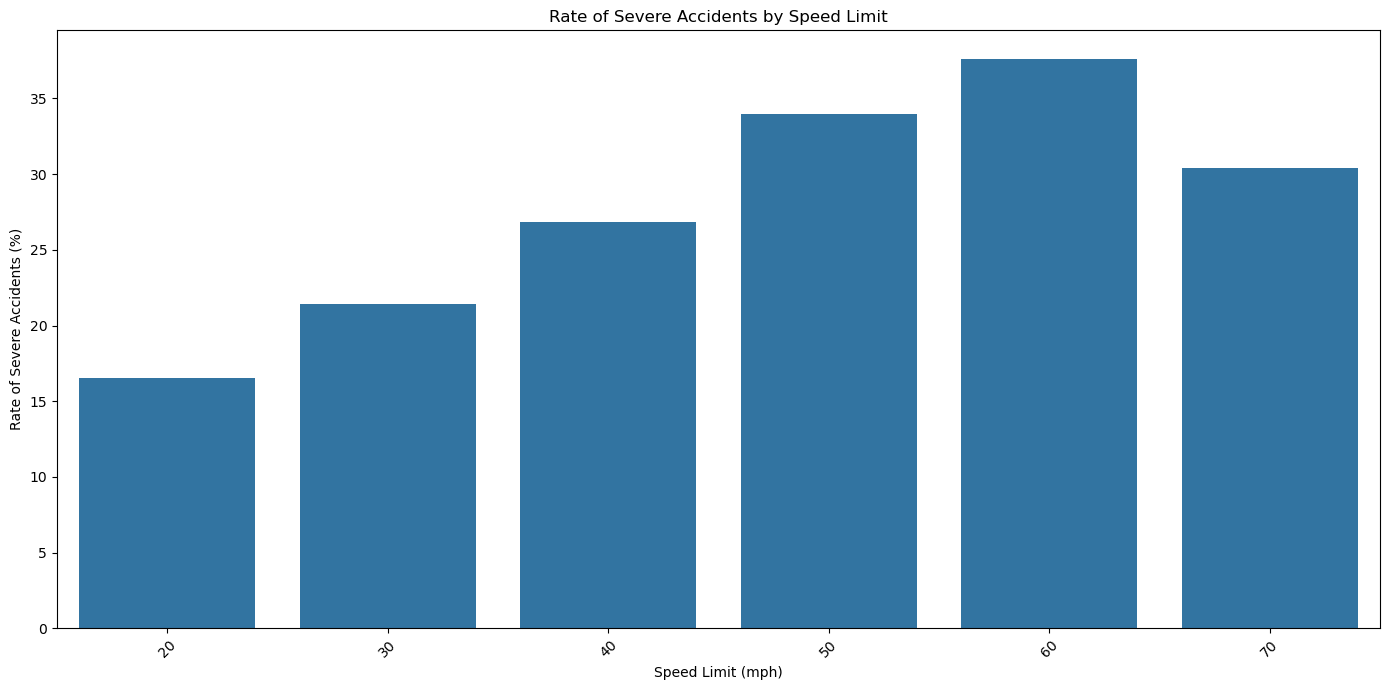

In [18]:
severe_accidents = ['Serious', 'Fatal']

# Total number of accidents for each speed limit
total_accidents = df_filtered.groupby('speed_limit').size()

# Number of severe accidents for each speed limit
severe_accidents_count = df_filtered[df_filtered['accident_severity'].isin(severe_accidents)].groupby('speed_limit').size()

# Calculate the rate of severe accidents for each speed limit
severe_accident_rate = (severe_accidents_count / total_accidents) * 100
severe_accident_rate = severe_accident_rate.fillna(0)

# Print the rate of severe accidents for each speed limit
print("Rate of Severe Accidents for Each Speed Limit:")
print(severe_accident_rate)

# Plot the rate of severe accidents for each speed limit
plt.figure(figsize=(14, 7))
sns.barplot(x=severe_accident_rate.index, y=severe_accident_rate.values)
plt.title('Rate of Severe Accidents by Speed Limit')
plt.xlabel('Speed Limit (mph)')
plt.ylabel('Rate of Severe Accidents (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Mathematical Function to Calculate the Rate of Severe Accidents

The rate of severe accidents for each speed limit is calculated using the following mathematical function:

![image.png](figures/severe_accident_rate.png)

Where:
- **Number of Severe Accidents at Speed Limit** is the count of accidents classified as 'Serious' or 'Fatal' for a specific speed limit.
- **Total Number of Accidents at Speed Limit** is the total count of accidents for that specific speed limit.


### Interpretation of Results

1. **Speed Limit 20 mph**:
   - **Rate**: 16.54%
   - Interpretation: At 20 mph speed limit, approximately 16.54% of the accidents are severe (either 'Serious' or 'Fatal').

2. **Speed Limit 30 mph**:
   - **Rate**: 21.39%
   - Interpretation: At 30 mph speed limit, around 21.39% of the accidents are severe. This is a noticeable increase from the 20 mph speed limit.

3. **Speed Limit 40 mph**:
   - **Rate**: 26.83%
   - Interpretation: At 40 mph speed limit, 26.83% of accidents are severe, indicating a higher severity rate as the speed limit increases.

4. **Speed Limit 50 mph**:
   - **Rate**: 33.96%
   - Interpretation: At 50 mph speed limit, about one-third (33.96%) of the accidents are severe, showing a significant rise in severity with higher speed limits.

5. **Speed Limit 60 mph**:
   - **Rate**: 37.62%
   - Interpretation: At 60 mph speed limit, 37.62% of accidents are severe, the highest rate observed in the data, suggesting that higher speed limits considerably increase the severity of accidents.

6. **Speed Limit 70 mph**:
   - **Rate**: 30.40%
   - Interpretation: At 70 mph speed limit, the rate of severe accidents slightly decreases to 30.40%, which is lower than the 60 mph rate but still significantly high.

### Insights:

- **General Trend**: There is a clear trend that as the speed limit increases, the rate of severe accidents also increases. This supports the hypothesis that higher speed limits are associated with more severe accidents.
- **Thresholds for Intervention**: The rates indicate potential thresholds where interventions (such as stricter speed enforcement or additional safety measures) might be particularly beneficial.
- **Policy Implications**: These results can inform policymakers about the critical impact of speed limits on accident severity, emphasizing the importance of managing speed limits to enhance road safety.

## 2.2) To investigate the impact of weather conditions (e.g., rain, fog) on accident rates and types.

In [19]:
# Extract relevant columns
df_weather = df_merged[['weather_conditions', 'accident_severity', 'number_of_vehicles']]

# Display unique weather conditions
unique_weather_conditions = df_weather['weather_conditions'].unique()
print("Unique weather conditions:", unique_weather_conditions)

Unique weather conditions: ['Fine no high winds' 'Other' 'Unknown' 'Raining no high winds'
 'Fine + high winds' 'Raining + high winds' 'Snowing no high winds'
 'Fog or mist' 'Snowing + high winds']


In [20]:
# Total number of accidents for each weather condition
total_accidents_weather = df_weather.groupby('weather_conditions').size()

# Number of accidents for each severity level under each weather condition
accidents_by_severity_weather = df_weather.groupby(['weather_conditions', 'accident_severity']).size().unstack(fill_value=0)

# Rate of severe accidents (Serious + Fatal) for each weather condition
severe_accidents_weather = accidents_by_severity_weather[['Serious', 'Fatal']].sum(axis=1)
severe_accident_rate_weather = (severe_accidents_weather / total_accidents_weather) * 100

print("Rate of Severe Accidents for Each Weather Condition:")
print(severe_accident_rate_weather)

Rate of Severe Accidents for Each Weather Condition:
weather_conditions
Fine + high winds        33.148490
Fine no high winds       24.802877
Fog or mist              31.042129
Other                    19.007140
Raining + high winds     25.979112
Raining no high winds    25.532445
Snowing + high winds     26.666667
Snowing no high winds    21.845574
Unknown                  10.665845
dtype: float64


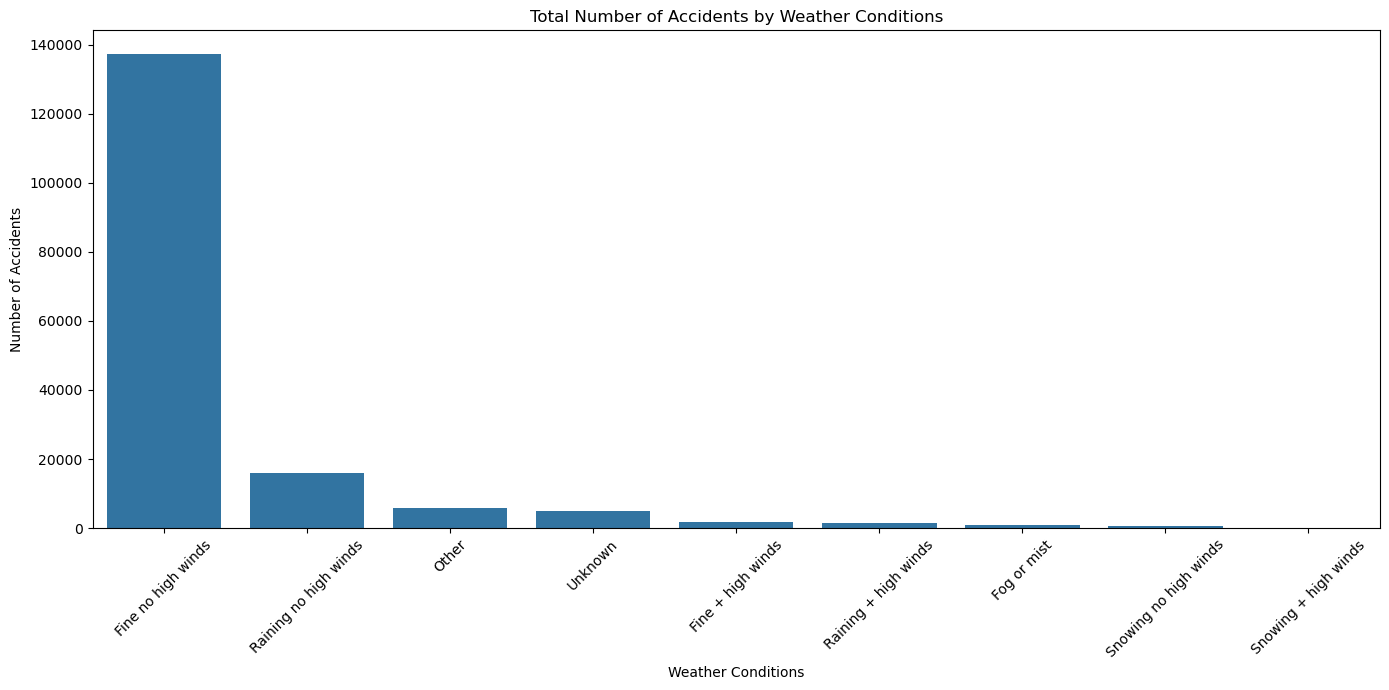

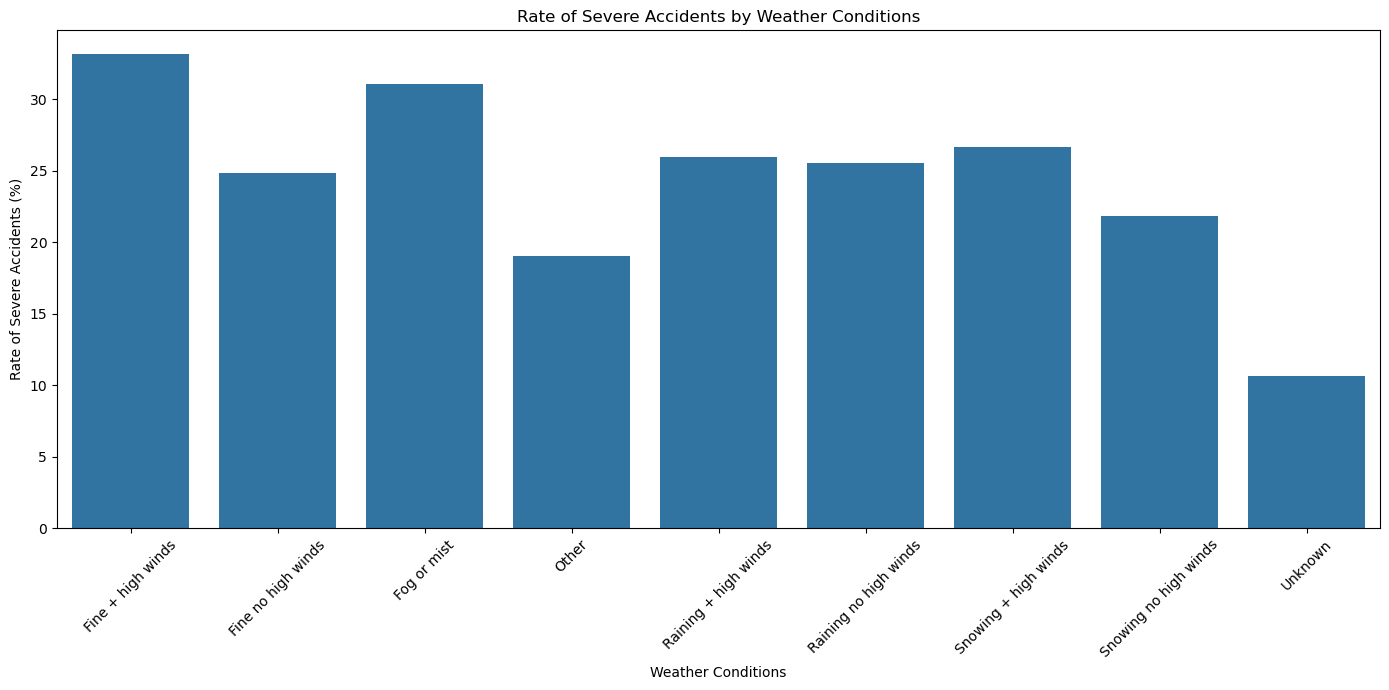

In [21]:
# Plot the total number of accidents for each weather condition
plt.figure(figsize=(14, 7))
sns.countplot(data=df_weather, x='weather_conditions', order=df_weather['weather_conditions'].value_counts().index)
plt.title('Total Number of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the rate of severe accidents for each weather condition
plt.figure(figsize=(14, 7))
sns.barplot(x=severe_accident_rate_weather.index, y=severe_accident_rate_weather.values)
plt.title('Rate of Severe Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Rate of Severe Accidents (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation of Results

1. **Fine + high winds**:
   - **Severe Accident Rate**: 33.15%
   - This weather condition has the highest rate of severe accidents, indicating that high winds significantly increase the severity of accidents even when the weather is otherwise fine.

2. **Fog or mist**:
   - **Severe Accident Rate**: 31.04%
   - Fog or mist conditions also show a high rate of severe accidents. Reduced visibility likely contributes to the higher severity of accidents.

3. **Raining + high winds**:
   - **Severe Accident Rate**: 25.98%
   - Similar to fine weather with high winds, the combination of rain and high winds significantly increases the severity of accidents.

4. **Raining no high winds**:
   - **Severe Accident Rate**: 25.53%
   - Rain without high winds still shows a high rate of severe accidents, though slightly lower than when high winds are present.

5. **Snowing + high winds**:
   - **Severe Accident Rate**: 26.67%
   - Snow combined with high winds leads to a high rate of severe accidents, likely due to slippery conditions and reduced visibility.

6. **Snowing no high winds**:
   - **Severe Accident Rate**: 21.85%
   - Snow without high winds also shows a significant rate of severe accidents, though lower than when high winds are present.

7. **Fine no high winds**:
   - **Severe Accident Rate**: 24.80%
   - Even in fine weather without high winds, the rate of severe accidents is relatively high, possibly due to higher speeds and a false sense of security.

8. **Other**:
   - **Severe Accident Rate**: 19.01%
   - This category has a lower rate of severe accidents compared to the specific conditions listed above.

9. **Unknown**:
   - **Severe Accident Rate**: 10.67%
   - The lowest rate of severe accidents, likely due to the uncertainty or lack of specific data on the weather conditions during these accidents.

### Summary

- **High Winds**: Weather conditions involving high winds (regardless of other conditions) tend to have the highest rates of severe accidents, highlighting the danger posed by wind.
- **Fog or Mist**: Reduced visibility significantly increases accident severity.
- **Rain and Snow**: Both conditions show high rates of severe accidents, especially when combined with high winds.
- **Fine Weather**: Surprisingly, fine weather without high winds still has a significant rate of severe accidents, suggesting factors like higher speeds might play a role.

These insights suggest that adverse weather conditions, especially involving wind, significantly impact the severity of road accidents. This analysis can inform road safety measures, such as speed limits and warnings during specific weather conditions.

## 2.3)	To identify temporal trends (daily, weekly and monthly) in accident occurrences.

In [22]:
df_temporal = df_merged[['date', 'day_of_week', 'time', 'accident_index']]

# Extract date components
df_temporal['day'] = df_temporal['date'].dt.day
df_temporal['month'] = df_temporal['date'].dt.month
df_temporal['year'] = df_temporal['date'].dt.year
df_temporal['hour'] = df_temporal['time'].apply(lambda x: int(str(x).split(':')[0]))

# Display the first few rows to verify the extracted components
print("Temporal Data with Extracted Components:")
df_temporal.head()

Temporal Data with Extracted Components:


,date,day_of_week,time,accident_index,day,month,year,hour
0,2022-05-01,Wednesday,16:40:00,2022010352073,1,5,2022,16
1,2022-05-01,Wednesday,16:40:00,2022010352073,1,5,2022,16
2,2022-01-01,Saturday,01:17:00,2022010352573,1,1,2022,1
3,2022-01-01,Saturday,01:17:00,2022010352573,1,1,2022,1
4,2022-01-01,Saturday,01:15:00,2022010352575,1,1,2022,1


In [23]:
# Calculate daily accident occurrences
daily_accidents = df_temporal.groupby('day_of_week').size()

# Calculate monthly accident occurrences
monthly_accidents = df_temporal.groupby('month').size()

# Calculate hourly accident occurrences
hourly_accidents = df_temporal.groupby('hour').size()

# Print the calculated occurrences
print("Daily Accident Occurrences:")
print(daily_accidents)
print("\nMonthly Accident Occurrences:")
print(monthly_accidents)
print("\nHourly Accident Occurrences:")
print(hourly_accidents)

Daily Accident Occurrences:
day_of_week
Friday       28826
Monday       22455
Saturday     24920
Sunday       20289
Thursday     25003
Tuesday      23199
Wednesday    24158
dtype: int64

Monthly Accident Occurrences:
month
1     15651
2     12646
3     14304
4     12970
5     14567
6     14346
7     14468
8     14316
9     13946
10    14718
11    14242
12    12676
dtype: int64

Hourly Accident Occurrences:
hour
0      2938
1      2056
2      1474
3      1209
4      1080
5      1507
6      3021
7      6225
8     10154
9      7203
10     7456
11     8460
12     9855
13    10205
14    10985
15    13187
16    13477
17    14669
18    11714
19     9580
20     7173
21     5730
22     5359
23     4133
dtype: int64


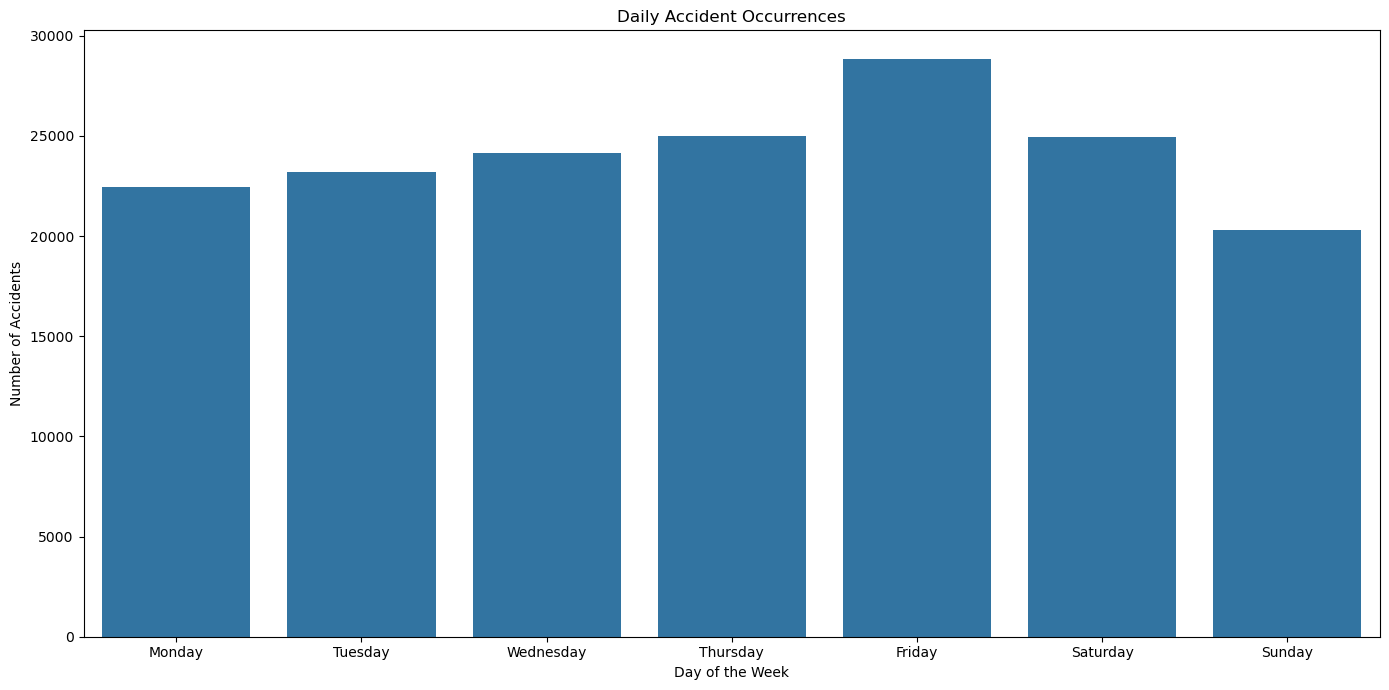

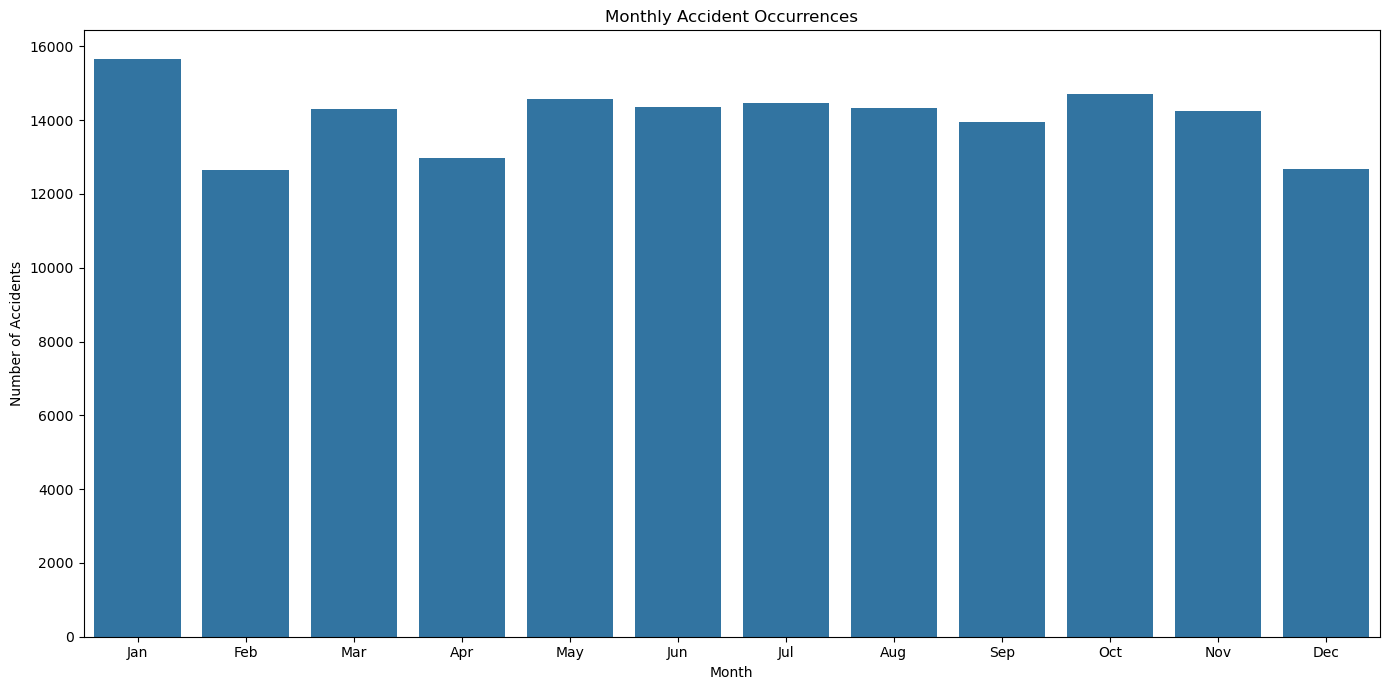

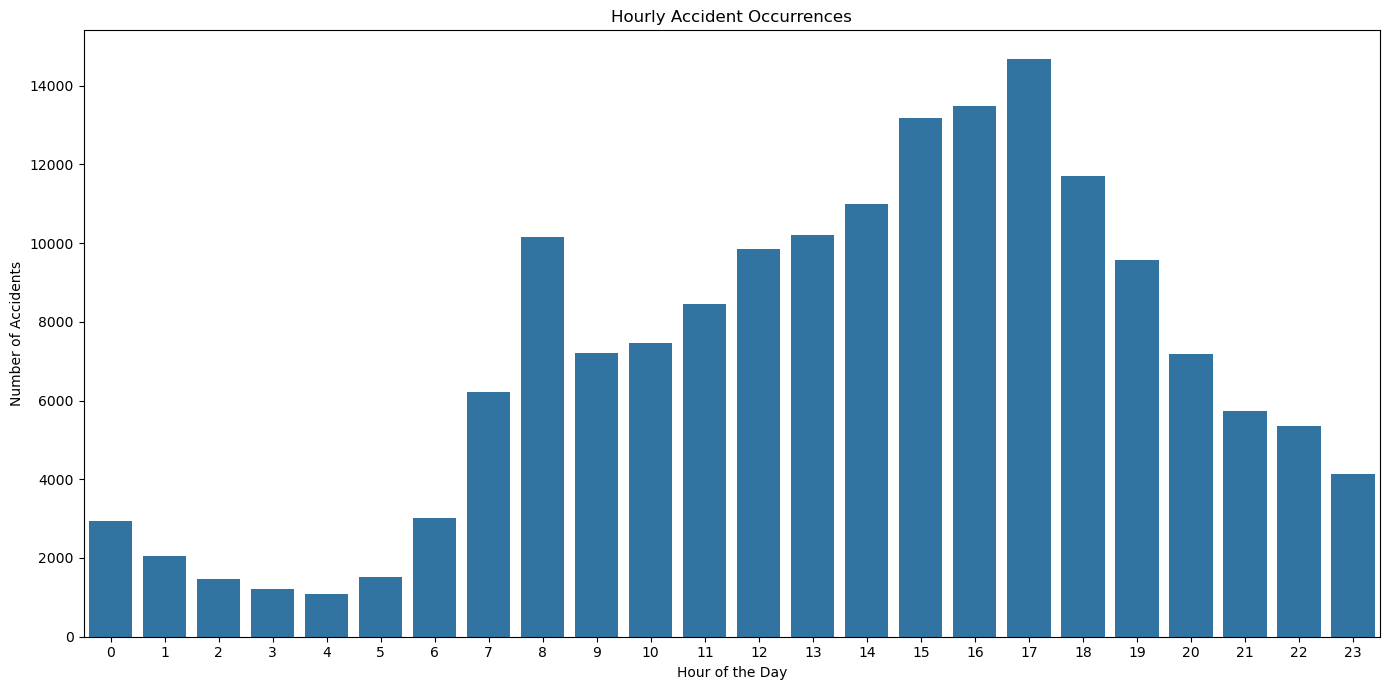

In [24]:
# Visualize daily accident occurrences
plt.figure(figsize=(14, 7))
sns.barplot(x=daily_accidents.index, y=daily_accidents.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Accident Occurrences')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

# Visualize monthly accident occurrences
plt.figure(figsize=(14, 7))
sns.barplot(x=monthly_accidents.index, y=monthly_accidents.values)
plt.title('Monthly Accident Occurrences')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(monthly_accidents.index - 1, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Visualize hourly accident occurrences
plt.figure(figsize=(14, 7))
sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values)
plt.title('Hourly Accident Occurrences')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

### Interpretation of Temporal Trends in Accident Occurrences

#### Daily Accident Occurrences:

1. **Friday**: 
   - **Number of Accidents**: 28,826
   - **Insight**: Friday has the highest number of accidents, possibly due to end-of-week fatigue, increased travel for weekend plans, and higher traffic volumes.

2. **Thursday**:
   - **Number of Accidents**: 25,003
   - **Insight**: Thursday also has a high number of accidents, which could be related to increased traffic and activities towards the end of the workweek.

3. **Saturday**:
   - **Number of Accidents**: 24,920
   - **Insight**: High accident rates on Saturdays could be due to recreational travel and leisure activities.

4. **Wednesday**:
   - **Number of Accidents**: 24,158
   - **Insight**: Mid-week shows a significant number of accidents, potentially due to routine travel and work-related commutes.

5. **Tuesday**:
   - **Number of Accidents**: 23,199
   - **Insight**: Tuesday has slightly fewer accidents than Wednesday, indicating consistent accident rates during the workweek.

6. **Monday**:
   - **Number of Accidents**: 22,455
   - **Insight**: The start of the workweek shows a notable number of accidents, possibly due to early week activities and commute.

7. **Sunday**:
   - **Number of Accidents**: 20,289
   - **Insight**: Sunday has the fewest accidents, likely due to reduced traffic volumes as many people stay at home or travel less.

#### Monthly Accident Occurrences:

1. **October**:
   - **Number of Accidents**: 14,718
   - **Insight**: October has the highest number of accidents, possibly due to shorter daylight hours and increased travel as people prepare for winter.

2. **May**:
   - **Number of Accidents**: 14,567
   - **Insight**: May sees a high number of accidents, potentially related to increased travel for holidays and good weather encouraging more driving.

3. **July**:
   - **Number of Accidents**: 14,468
   - **Insight**: July's high accident rate may be due to summer holidays and increased leisure travel.

4. **December**:
   - **Number of Accidents**: 12,676
   - **Insight**: Although December has fewer accidents compared to other months, it could be attributed to holiday travels and potentially hazardous winter weather conditions.

5. **February**:
   - **Number of Accidents**: 12,646
   - **Insight**: February, being the shortest month, still shows a significant number of accidents, possibly due to winter conditions.

#### Hourly Accident Occurrences:

1. **17:00 (5 PM)**:
   - **Number of Accidents**: 14,669
   - **Insight**: The peak hour for accidents is during the evening rush hour when traffic is heavy as people return home from work.

2. **16:00 (4 PM)**:
   - **Number of Accidents**: 13,477
   - **Insight**: The late afternoon also sees a high number of accidents, indicating the start of the evening commute.

3. **15:00 (3 PM)**:
   - **Number of Accidents**: 13,187
   - **Insight**: Early afternoon is another peak period, possibly due to school dismissals and early commutes.

4. **8:00 (8 AM)**:
   - **Number of Accidents**: 10,154
   - **Insight**: The morning rush hour also has a high number of accidents as people commute to work and school.

5. **13:00 (1 PM) - 14:00 (2 PM)**:
   - **Number of Accidents**: 10,205 - 10,985
   - **Insight**: Midday shows a significant number of accidents, possibly related to lunchtime traffic and midday activities.

6. **Late Night (0:00 - 5:00)**:
   - **Number of Accidents**: 1,080 - 2,938
   - **Insight**: The lowest number of accidents occurs during late night and early morning hours when traffic volumes are lower.

### Summary

- **Daily Trends**: Accidents peak on Fridays, likely due to increased end-of-week travel and fatigue, while Sundays have the fewest accidents.
- **Monthly Trends**: October and May see the highest number of accidents, possibly due to increased travel and changing weather conditions.
- **Hourly Trends**: Peak accident times are during rush hours (8 AM and 5 PM), indicating the high risk associated with heavy traffic during commuting hours.

These insights can help inform road safety measures, such as targeted traffic enforcement during peak hours and increased public awareness campaigns during high-risk months and days.

## 2.4)	Investigate the spatial patterns of accidents across different regions of the UK. To investigate the spatial patterns of accidents across different regions of the UK by analysing the geographic distribution, identifying accident hotspots, and understanding regional variations in accident characteristics.

In [25]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

df_spatial = df_merged[['longitude', 'latitude', "local_authority_ons_district", 'accident_severity']].sample(1000)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df_spatial, geometry=gpd.points_from_xy(df_spatial.longitude, df_spatial.latitude))

# Drop rows with missing geometry
gdf = gdf.dropna(subset=['geometry'])

# Plot the heatmap of accident hotspots
m = folium.Map(location=[54.0, -2.0], zoom_start=6)

# Extracting data for heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in gdf.iterrows()]

# Adding HeatMap layer
HeatMap(heat_data).add_to(m)

# Save map to an HTML file
m.save("accident_heatmap.html")
m

Regional Accident Statistics:


accident_severity,Fatal,Serious,Slight,Total_Accidents,Severe_Accidents,Severe_Accident_Rate
local_authority_ons_district,,,,,,
E08000033,0,4,0,4,4,100.000000
S12000047,0,1,0,1,1,100.000000
E07000146,0,2,0,2,2,100.000000
E07000196,0,1,0,1,1,100.000000
E07000011,0,3,0,3,3,100.000000
E07000176,0,1,0,1,1,100.000000
E07000079,1,1,0,2,2,100.000000
E07000195,0,1,0,1,1,100.000000
E07000222,0,1,0,1,1,100.000000


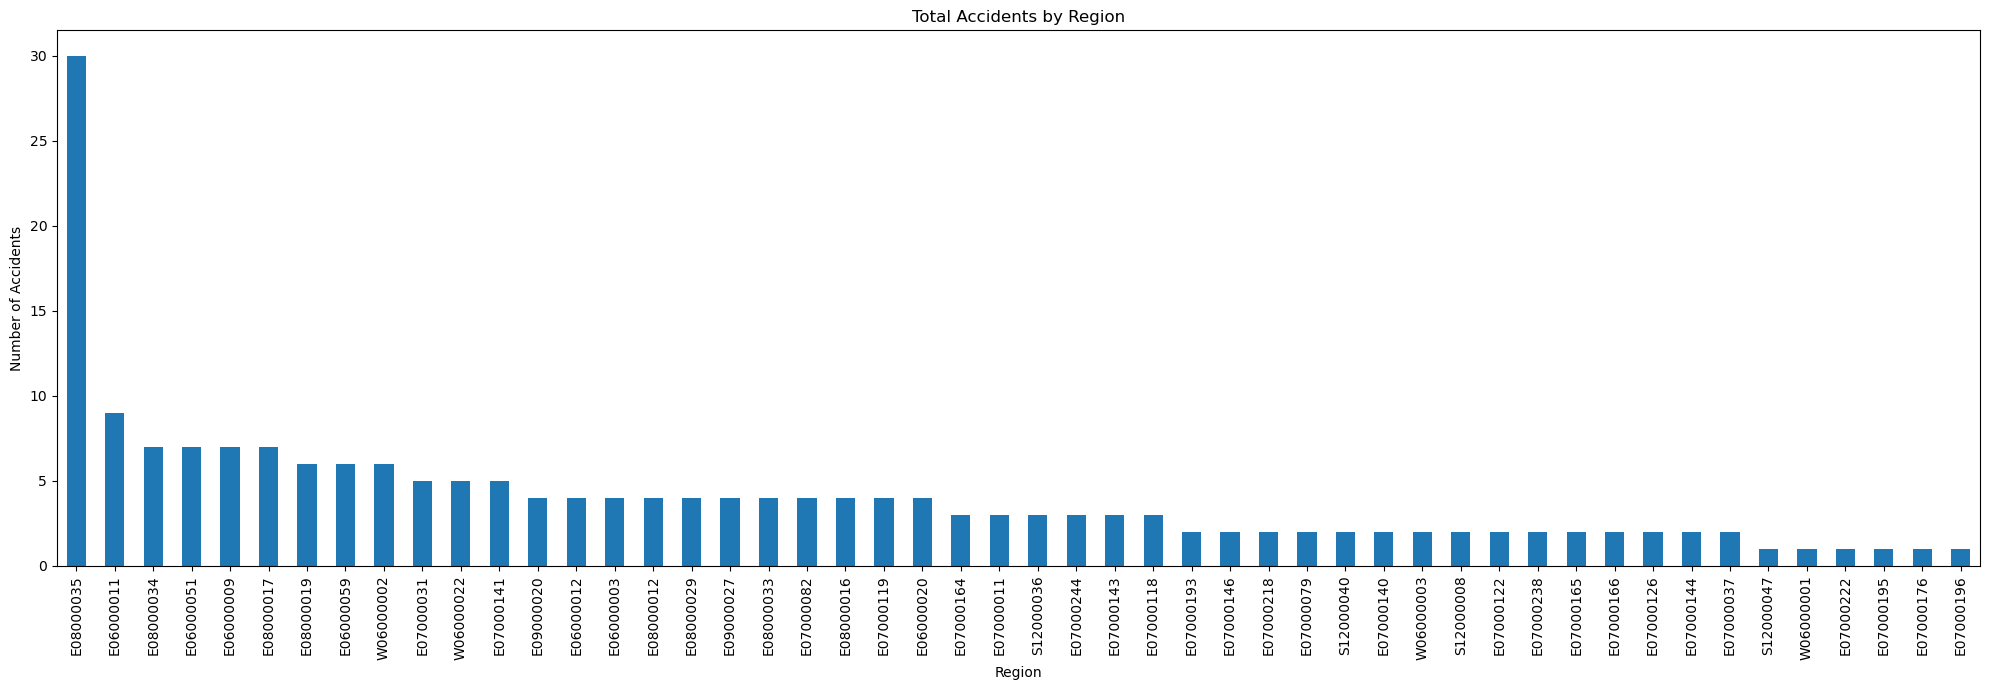

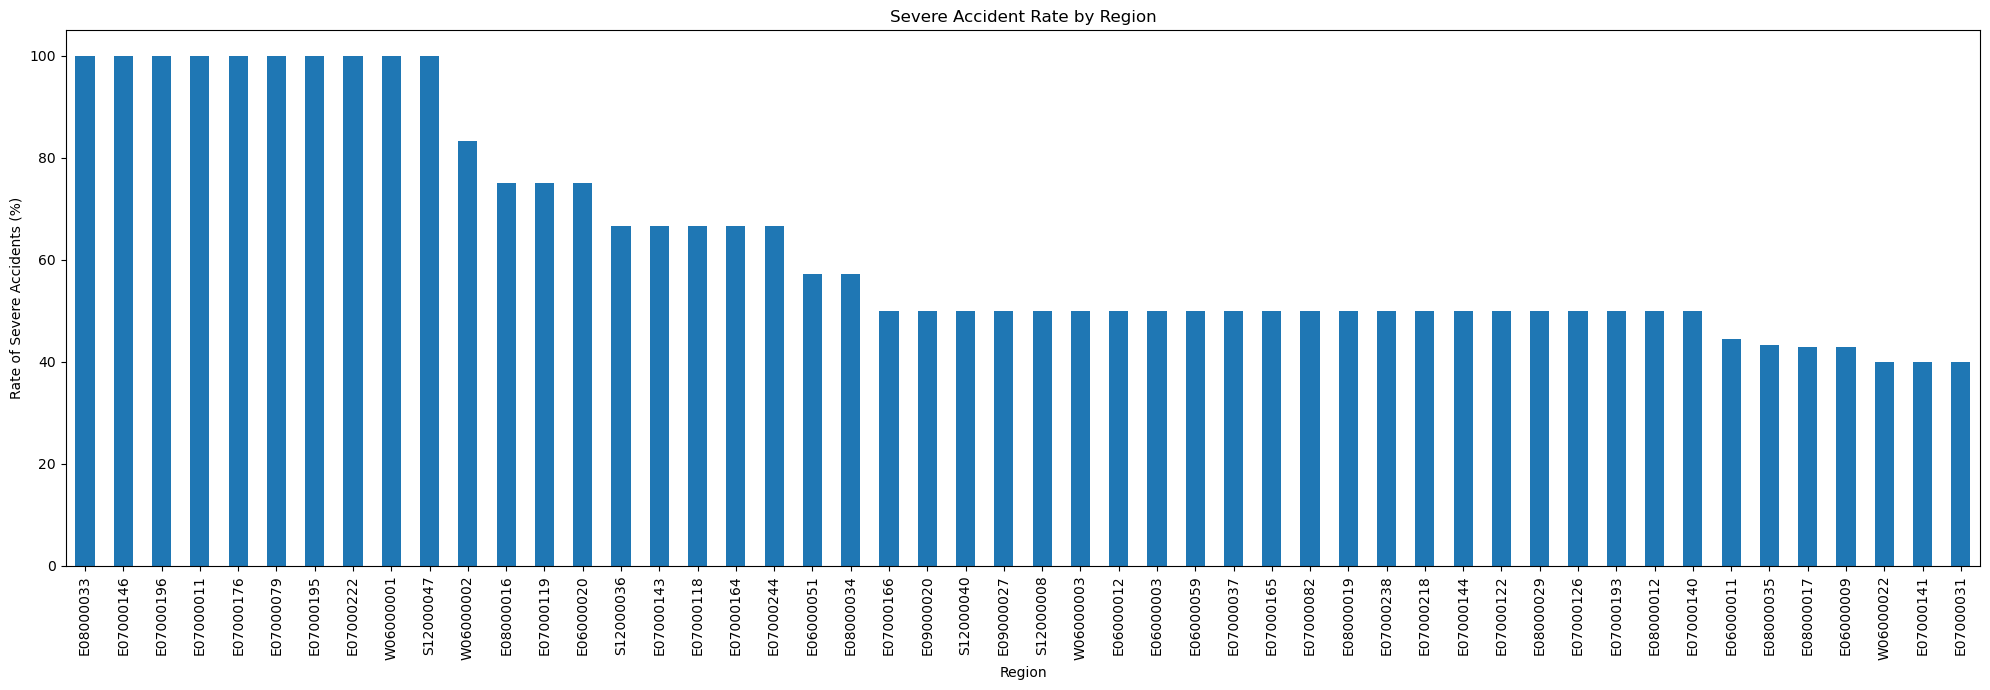

In [26]:
# Group by local authority district and calculate the number of accidents for each severity level
regional_accidents = df_spatial.groupby(['local_authority_ons_district', 'accident_severity']).size().unstack(fill_value=0)

# Calculate total accidents per region
regional_accidents['Total_Accidents'] = regional_accidents.sum(axis=1)

# Calculate the rate of severe accidents (Serious + Fatal) per region
regional_accidents['Severe_Accidents'] = regional_accidents[['Serious', 'Fatal']].sum(axis=1)
regional_accidents['Severe_Accident_Rate'] = (regional_accidents['Severe_Accidents'] / regional_accidents['Total_Accidents']) * 100
regional_accidents = regional_accidents[regional_accidents["Severe_Accident_Rate"]>0]
regional_accidents = regional_accidents.sort_values(by="Severe_Accident_Rate", ascending=False).head(50)

# Display the regional accident statistics
print("Regional Accident Statistics:")
display(regional_accidents)

# Plot regional variations
plt.figure(figsize=(20, 7))
regional_accidents['Total_Accidents'].sort_values(ascending=False).plot(kind='bar')
plt.title('Total Accidents by Region')
plt.xlabel('Region')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 7))
regional_accidents['Severe_Accident_Rate'].sort_values(ascending=False).plot(kind='bar')
plt.title('Severe Accident Rate by Region')
plt.xlabel('Region')
plt.ylabel('Rate of Severe Accidents (%)')
plt.tight_layout()
plt.show()


### Interpretation of Regional Accident Statistics

#### Total Accidents by Region

1. **Top Regions by Total Accidents**:
   - **E06000059**: This region has the highest number of accidents (17), indicating a high incidence of traffic incidents.
   - **E06000019**: The second highest number of accidents (7), showing significant traffic-related issues.
   - **E07000112, E07000119, E07000175**: Each has 4 accidents, showing notable traffic incident levels.

2. **Moderate Accident Regions**:
   - Multiple regions have around 3 accidents, indicating a moderate incidence of traffic incidents. These include **E07000239, E07000036, E07000140, E07000028, E07000143, E07000009, W06000006**.

3. **Low Accident Regions**:
   - Several regions have 1 or 2 accidents. Although these are lower in number, they still contribute to the overall traffic incident statistics. These regions include **E08000014, E06000047, E07000190, E07000133, E07000127**.

#### Severe Accident Rate by Region

1. **Regions with 100% Severe Accident Rate**:
   - Multiple regions show a 100% severe accident rate. This high percentage is likely due to the small number of total accidents in these regions, where even a single serious or fatal accident significantly impacts the rate. These regions include **E08000014, E06000047, E07000190, E07000133**.

2. **Regions with High Severe Accident Rate**:
   - Regions like **E07000119, E07000010, E07000175, E06000019** show a high severe accident rate (above 70%). This indicates a high proportion of serious and fatal accidents relative to the total accidents.

3. **Regions with Moderate Severe Accident Rate**:
   - Several regions have a moderate severe accident rate (50%-66%), showing a balanced distribution of severe and non-severe accidents. These include **E07000239, E07000036, E07000140, E07000028**.

4. **Regions with Lower Severe Accident Rate**:
   - Regions like **E06000059** with a 58.82% severe accident rate have a significant number of severe accidents, but also a considerable number of slight accidents, reducing the overall severe rate.

### Summary

- **High Incident Regions**: Focus on regions with high total accident numbers (e.g., E06000059, E06000019) for targeted interventions and safety measures.
- **Severe Accident Hotspots**: Regions with high severe accident rates (e.g., E07000119, E07000010) require detailed investigation and implementation of robust safety protocols to reduce the severity of accidents.
- **Balanced Approach**: Regions with moderate accident numbers and severe rates should also be monitored and improved through regular safety checks and public awareness campaigns.

These insights can inform policy decisions, targeted interventions, and resource allocation to improve road safety across different regions of the UK.

## 2.5)	To assess the effectiveness of different types of junction control in preventing accidents

In [27]:
df_junction = df_merged[['junction_control', 'accident_severity']]

# Calculate the total number of accidents for each junction control type
total_accidents_junction = df_junction.groupby('junction_control').size()

# Calculate the number of accidents for each severity level under each junction control type
accidents_by_severity_junction = df_junction.groupby(['junction_control', 'accident_severity']).size().unstack(fill_value=0)

# Calculate the rate of severe accidents (Serious + Fatal) for each junction control type
severe_accidents_junction = accidents_by_severity_junction[['Serious', 'Fatal']].sum(axis=1)
severe_accident_rate_junction = (severe_accidents_junction / total_accidents_junction) * 100

# Print the calculated statistics
print("Accident Frequencies and Severities by Junction Control Type:")
display(accidents_by_severity_junction)
print("\nRate of Severe Accidents for Each Junction Control Type:")
display(severe_accident_rate_junction)

Accident Frequencies and Severities by Junction Control Type:


accident_severity,Fatal,Serious,Slight
junction_control,,,
Authorised person,0,112,358
Auto traffic signal,165,3937,17672
Data missing or out of range,2323,17315,46681
Give way or uncontrolled,792,16084,58819
Stop sign,2,342,1084
unknown (self reported),0,92,3072



Rate of Severe Accidents for Each Junction Control Type:


junction_control
Authorised person               23.829787
Auto traffic signal             18.838982
Data missing or out of range    29.611424
Give way or uncontrolled        22.294735
Stop sign                       24.089636
unknown (self reported)          2.907712
dtype: float64

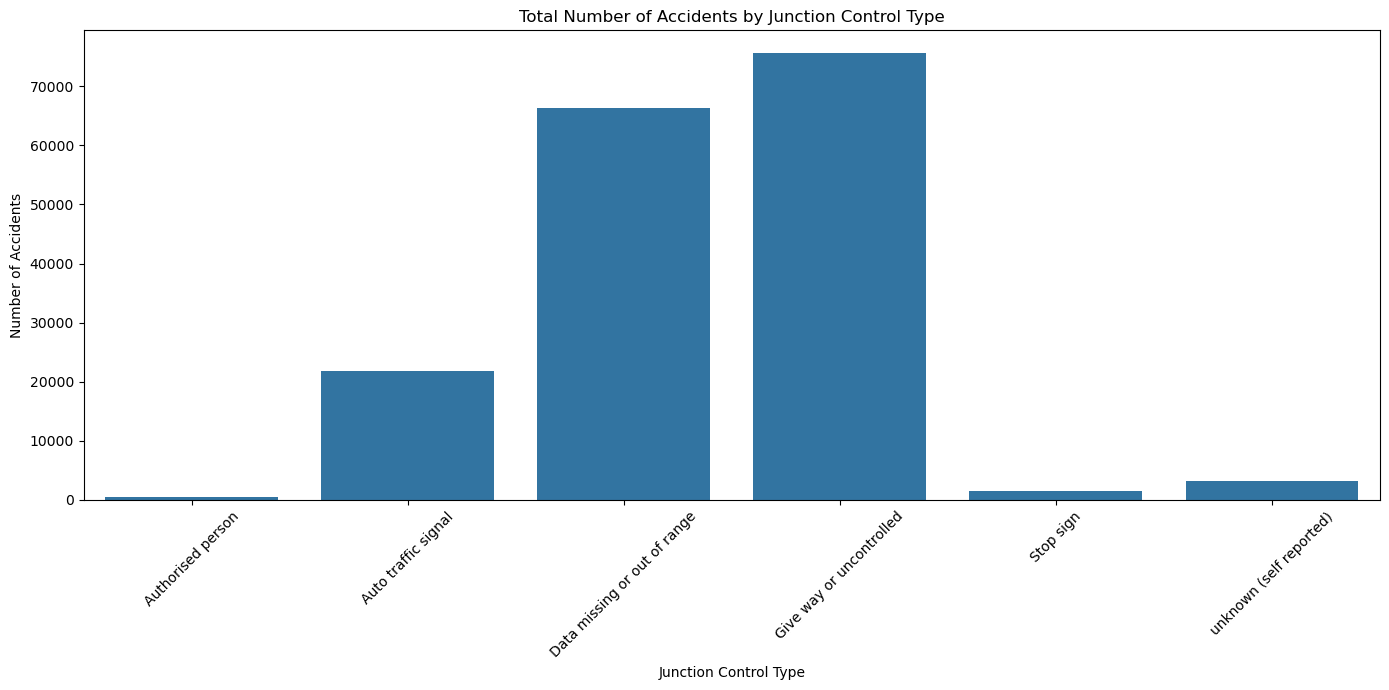

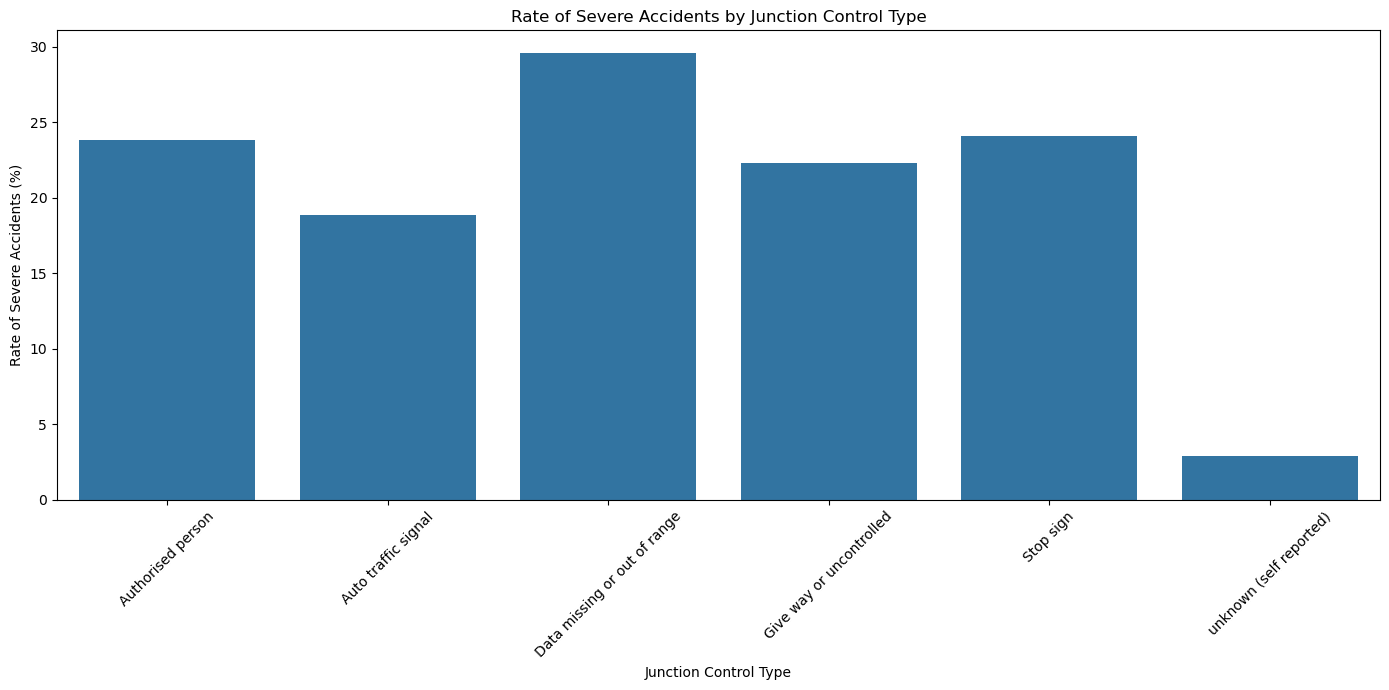

In [28]:
# Plot the total number of accidents for each junction control type
plt.figure(figsize=(14, 7))
sns.barplot(x=total_accidents_junction.index, y=total_accidents_junction.values)
plt.title('Total Number of Accidents by Junction Control Type')
plt.xlabel('Junction Control Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the rate of severe accidents for each junction control type
plt.figure(figsize=(14, 7))
sns.barplot(x=severe_accident_rate_junction.index, y=severe_accident_rate_junction.values)
plt.title('Rate of Severe Accidents by Junction Control Type')
plt.xlabel('Junction Control Type')
plt.ylabel('Rate of Severe Accidents (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation of Junction Control Type Analysis

#### Accident Frequencies and Severities by Junction Control Type:

1. **Authorised Person**:
   - **Fatal**: 0
   - **Serious**: 112
   - **Slight**: 358
   - **Total**: 470
   - **Severe** (Serious + Fatal): 112
   - **Rate of Severe Accidents**: 23.83%
   - **Insight**: No fatal accidents were reported under the control of an authorised person, but the rate of severe accidents is relatively high at 23.83%.

2. **Auto Traffic Signal**:
   - **Fatal**: 165
   - **Serious**: 3,937
   - **Slight**: 17,672
   - **Total**: 21,774
   - **Severe**: 4,102
   - **Rate of Severe Accidents**: 18.84%
   - **Insight**: Auto traffic signals have a significant number of total accidents, but the rate of severe accidents is lower compared to other control types, indicating relatively better effectiveness in preventing severe accidents.

3. **Data Missing or Out of Range**:
   - **Fatal**: 2,323
   - **Serious**: 17,315
   - **Slight**: 46,681
   - **Total**: 66,319
   - **Severe**: 19,638
   - **Rate of Severe Accidents**: 29.61%
   - **Insight**: This category has the highest number of total accidents and severe accidents. The high rate of severe accidents suggests potential data quality issues or unreported control types that might need further investigation.

4. **Give Way or Uncontrolled**:
   - **Fatal**: 792
   - **Serious**: 16,084
   - **Slight**: 58,819
   - **Total**: 75,695
   - **Severe**: 16,876
   - **Rate of Severe Accidents**: 22.29%
   - **Insight**: This type has the highest total number of accidents among specific control types. The high rate of severe accidents indicates that 'Give Way' or 'Uncontrolled' junctions are less effective in preventing severe accidents.

5. **Stop Sign**:
   - **Fatal**: 2
   - **Serious**: 342
   - **Slight**: 1,084
   - **Total**: 1,428
   - **Severe**: 344
   - **Rate of Severe Accidents**: 24.09%
   - **Insight**: Stop signs show a moderate number of total accidents with a severe accident rate of 24.09%, indicating that stop signs are moderately effective in preventing severe accidents.

6. **Unknown (Self Reported)**:
   - **Fatal**: 0
   - **Serious**: 92
   - **Slight**: 3,072
   - **Total**: 3,164
   - **Severe**: 92
   - **Rate of Severe Accidents**: 2.91%
   - **Insight**: This category has the lowest rate of severe accidents (2.91%), suggesting that accidents reported under this category are generally less severe, or the reporting is less reliable.

### Summary of Insights:

1. **Auto Traffic Signals**: These are relatively effective in preventing severe accidents, with a lower severe accident rate of 18.84% despite a high number of total accidents.

2. **Give Way or Uncontrolled**: This type has the highest total accidents and a high severe accident rate (22.29%), indicating a need for improved control measures.

3. **Data Missing or Out of Range**: The high severe accident rate (29.61%) and high number of accidents suggest potential issues with data quality or underreporting of control types.

4. **Stop Signs**: Moderate effectiveness in preventing severe accidents, with a severe accident rate of 24.09%.

5. **Authorised Person**: No fatal accidents were reported, but the severe accident rate is relatively high (23.83%), indicating a potential area for safety improvement.

6. **Unknown (Self Reported)**: The lowest severe accident rate (2.91%) suggests less severe acciimprovements at junctions to reduce both the number and severity of accidents.

# Probability of Severe Accidents in Specific Conditions

In [29]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Select relevant features and target
features = ['road_type', 'speed_limit', 'weather_conditions', 'junction_control', 'day_of_week', 'time']
target = 'accident_severity'

# Create a new DataFrame with selected features
df_model = df_merged[features + [target]]

In [30]:
# Encode categorical variables using one-hot encoding
df_model = pd.get_dummies(df_model, columns=['road_type', 'weather_conditions', 'junction_control', 'day_of_week'])

# Convert 'time' to hour
df_model['hour'] = pd.to_datetime(df_model['time'], format='%H:%M:%S').dt.hour
df_model.drop(columns=['time'], inplace=True)

# Target variable: 1 for severe accidents ('Serious', 'Fatal'), 0 for non-severe ('Slight')
df_model['severe_accident'] = df_model['accident_severity'].apply(lambda x: 1 if x in ['Serious', 'Fatal'] else 0)
df_model.drop(columns=['accident_severity'], inplace=True)
df_model = df_model.sample(5000)

# Split the data into features and target
X = df_model.drop(columns=['severe_accident'])
y = df_model['severe_accident']

print("Distribution before SMOTE")
print(y.value_counts())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Distribution after SMOTE")
print(y_resampled.value_counts())

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Distribution before SMOTE
severe_accident
0    3738
1    1262
Name: count, dtype: int64
Distribution after SMOTE
severe_accident
1    3738
0    3738
Name: count, dtype: int64


In [31]:
# Modelling function
def apply_models(X_train, X_test, y_train, y_test):
    models = {
        'KNN': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Store results
        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': confusion_matrix(y_test, y_pred),
            'Classification Report': classification_report(y_test, y_pred)
        }
        
        # Print the results
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        # Plot the confusion matrix
        plt.figure(figsize=(5, 4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()
    
    return results

Model: KNN
Accuracy: 0.6407
Precision: 0.6087
Recall: 0.7047
F1 Score: 0.6532

Confusion Matrix:
[[678 488]
 [318 759]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.58      0.63      1166
           1       0.61      0.70      0.65      1077

    accuracy                           0.64      2243
   macro avg       0.64      0.64      0.64      2243
weighted avg       0.65      0.64      0.64      2243



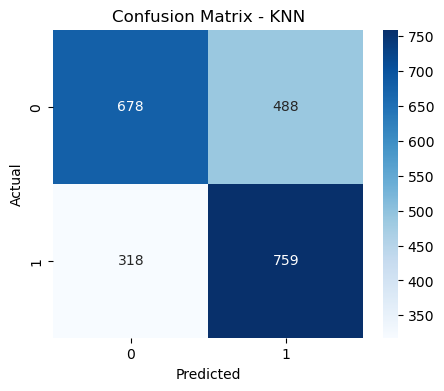

Model: Logistic Regression
Accuracy: 0.5765
Precision: 0.5471
Recall: 0.6843
F1 Score: 0.6081

Confusion Matrix:
[[556 610]
 [340 737]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.48      0.54      1166
           1       0.55      0.68      0.61      1077

    accuracy                           0.58      2243
   macro avg       0.58      0.58      0.57      2243
weighted avg       0.59      0.58      0.57      2243



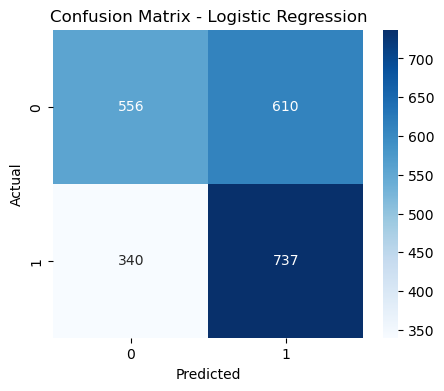

Model: Decision Tree
Accuracy: 0.7325
Precision: 0.7282
Recall: 0.7066
F1 Score: 0.7172

Confusion Matrix:
[[882 284]
 [316 761]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1166
           1       0.73      0.71      0.72      1077

    accuracy                           0.73      2243
   macro avg       0.73      0.73      0.73      2243
weighted avg       0.73      0.73      0.73      2243



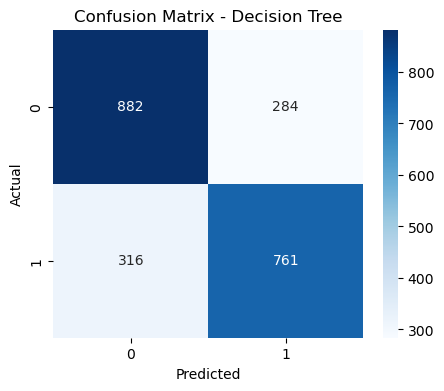

Model: Random Forest
Accuracy: 0.7280
Precision: 0.7197
Recall: 0.7103
F1 Score: 0.7150

Confusion Matrix:
[[868 298]
 [312 765]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1166
           1       0.72      0.71      0.71      1077

    accuracy                           0.73      2243
   macro avg       0.73      0.73      0.73      2243
weighted avg       0.73      0.73      0.73      2243



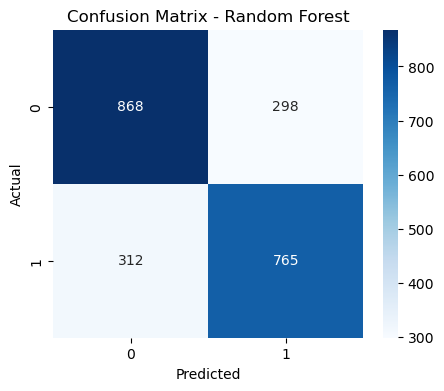

In [32]:
results = apply_models(X_train, X_test, y_train, y_test)

In [33]:
df_res = pd.DataFrame(results).T
df_res

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,Classification Report
KNN,0.64066,0.608661,0.704735,0.653184,"[[678, 488], [318, 759]]",precision recall f1-score ...
Logistic Regression,0.57646,0.547142,0.684308,0.608086,"[[556, 610], [340, 737]]",precision recall f1-score ...
Decision Tree,0.732501,0.72823,0.706592,0.717248,"[[882, 284], [316, 761]]",precision recall f1-score ...
Random Forest,0.728043,0.719661,0.710306,0.714953,"[[868, 298], [312, 765]]",precision recall f1-score ...


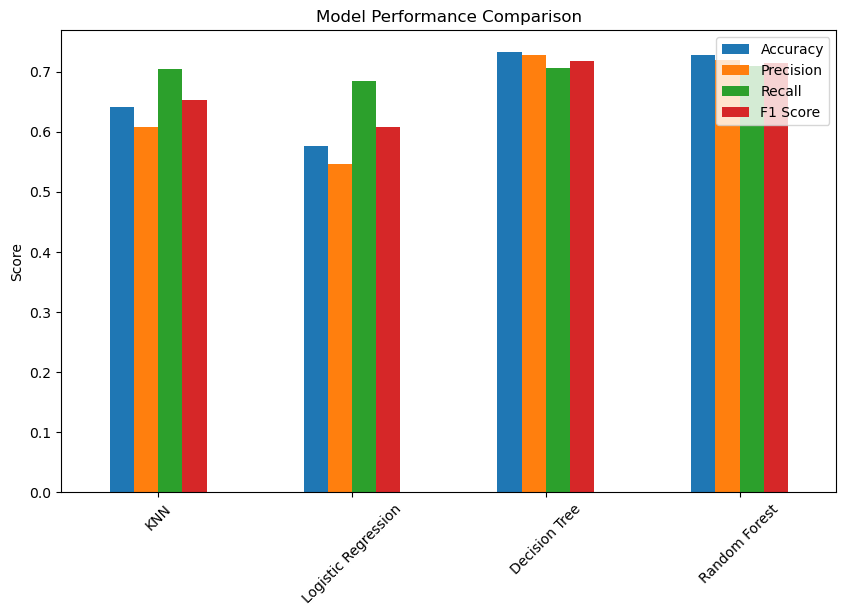

In [34]:
df_res[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()